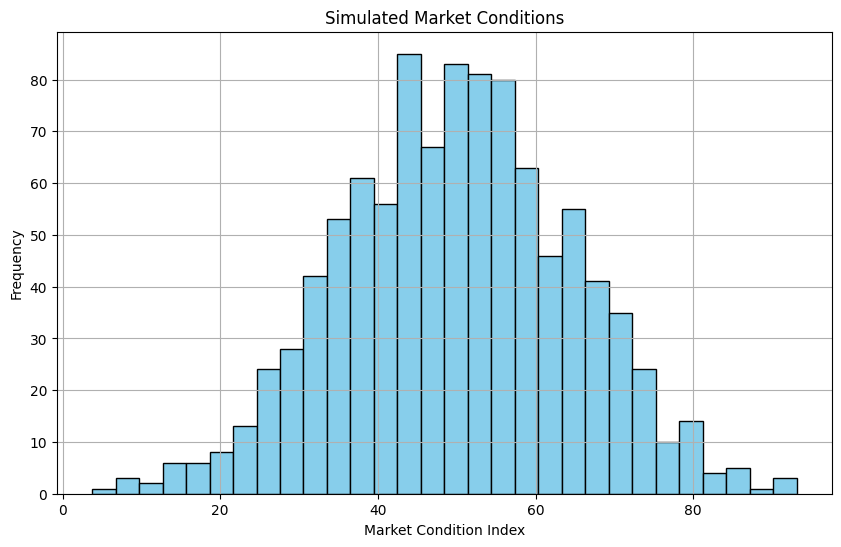

In [1]:
%run a_market_conditions.ipynb

In [2]:
# Example parameters
params = {
    'time_to_sell': {
        'base_months': 6,
        'volatility': 0.3,
        'min_months': 1
    }
}

In [3]:
def calculate_time_to_sell(market_conditions, n_simulations, params):
    base_time = params['time_to_sell']['base_months']
    time_multiplier = 2.0 - (market_conditions / 100) * 1.5
    random_factor = np.random.lognormal(
        mean=0,
        sigma=params['time_to_sell']['volatility'],
        size=n_simulations
    )
    time_to_sell = base_time * time_multiplier * random_factor
    return np.maximum(time_to_sell, params['time_to_sell']['min_months'])


In [5]:
# Run simulation
time_to_sell = calculate_time_to_sell(market_data, n_simulations, params)

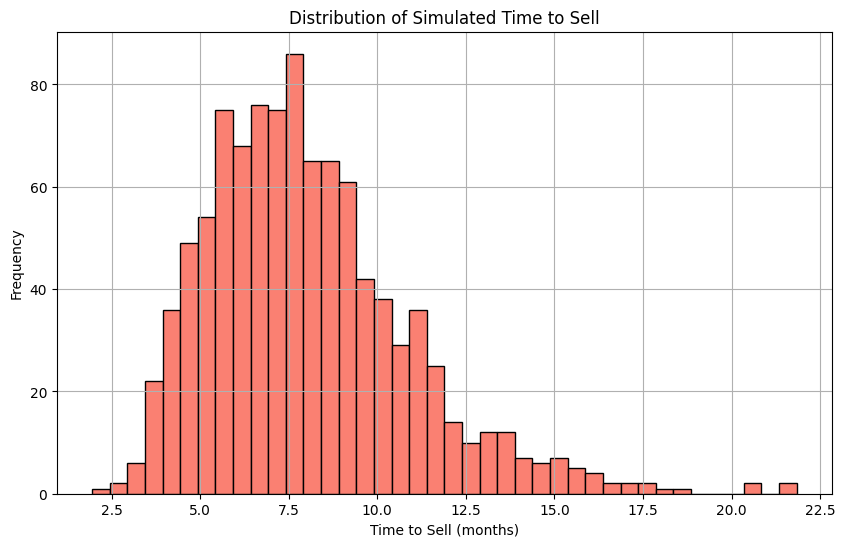

In [6]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(time_to_sell, bins=40, color='salmon', edgecolor='black')
plt.title('Distribution of Simulated Time to Sell')
plt.xlabel('Time to Sell (months)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()